In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!cp '/content/gdrive/MyDrive/平行hw2 report & plots/startendlog5.csv' .

Mounted at /content/gdrive


In [48]:
import pandas as pd
import numpy as np

# input original data
original_data = pd.read_csv('startendlog5.csv', header=None, index_col=False)
original_data = original_data.drop(columns=[0,2,4])
original_data.columns=['rank','thread','time','status']
original_data

'''
# align by time, get maxTime
original_data['time'] = original_data['time'] - original_data['time'].min()
original_data = original_data.sort_values(by=['time']).reset_index()
maxTime = original_data['time'].max()
'''

# replace sending_result to computing
original_data.loc[original_data['status']=='start_sending_result.', 'status'] = 'end_computing.'
original_data.loc[original_data['status']=='end_sending_result.', 'status'] = 'start_computing.'

original_data

rank  thread          time            status
0           2       0  2.376379e+06  start_computing.
1           2       0  2.376379e+06    end_computing.
2           0       0  2.376368e+06  start_computing.
3           1       0  2.376380e+06  start_computing.
4           1       0  2.376380e+06    end_computing.
...       ...     ...           ...               ...
2621443     0       1  2.376378e+06    end_computing.
2621444     0       0  2.376378e+06    end_computing.
2621445     0       3  2.376378e+06    end_computing.
2621446     0       3  2.376378e+06  start_computing.
2621447     0       3  2.376378e+06    end_computing.

[2621448 rows x 4 columns]

In [49]:

# 4 ranks, 6 threads

Datas = dict()
maxTime = 0

rank_pool = sorted(original_data['rank'].unique())

for processingRank in rank_pool:
    Datas_rank = dict()
    df_rank = original_data[original_data['rank']==processingRank]

    # align by time
    df_rank['time'] = df_rank['time'] - df_rank['time'].min()
    df_rank = df_rank.sort_values(by=['time']).reset_index()
    if df_rank['time'].max() > maxTime:
        maxTime = df_rank['time'].max()

    thread_pool = sorted(df_rank['thread'].unique())

    for processingThread in thread_pool:
        df_rank_thread = df_rank[df_rank['thread']==processingThread].reset_index()
        time_from = df_rank_thread['time'].values[::2]
        time_to = df_rank_thread['time'].values[1::2]
        computing_intervals = np.stack((time_from, time_to - time_from), axis=-1)
        Datas_rank[processingThread] = computing_intervals

    Datas[processingRank] = Datas_rank


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [50]:
time_from - time_to

array([-1.33000314e-04, -5.30001707e-05, -3.70000489e-05, ...,
       -2.79997475e-05, -1.05000101e-04, -4.20003198e-05])

now printing P0t0...
now printing P0t1...
now printing P0t2...
now printing P0t3...
now printing P0t4...
now printing P0t5...
now printing P1t0...
now printing P1t1...
now printing P1t2...
now printing P1t3...
now printing P1t4...
now printing P1t5...
now printing P2t0...
now printing P2t1...
now printing P2t2...
now printing P2t3...
now printing P2t4...
now printing P2t5...
now printing P3t0...
now printing P3t1...
now printing P3t2...
now printing P3t3...
now printing P3t4...
now printing P3t5...


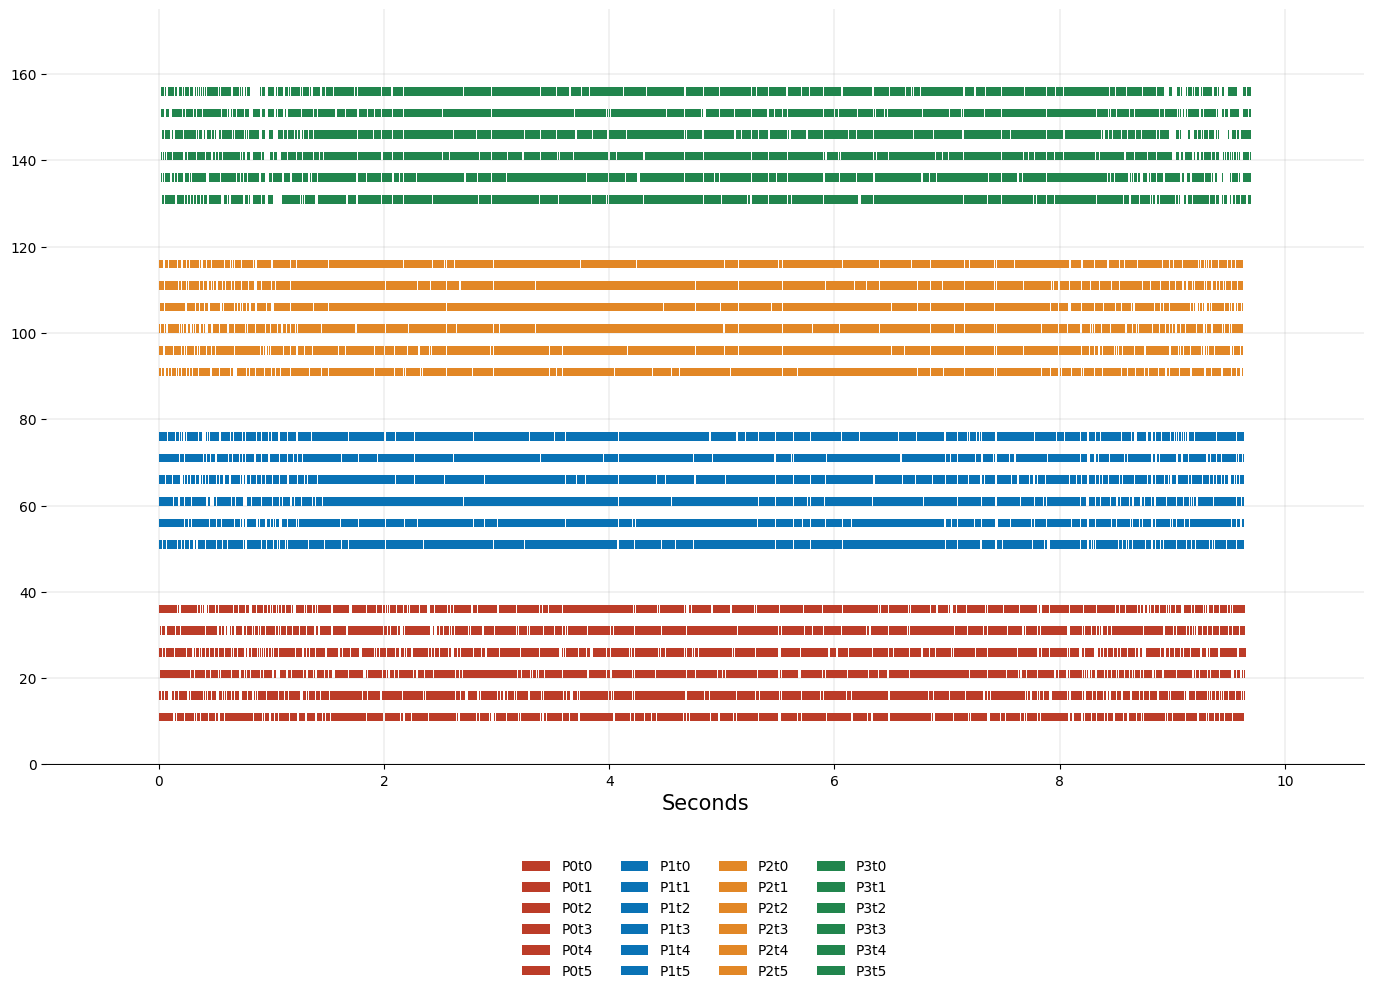

In [56]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(17,10),dpi=100,facecolor="white")
'''
ax.broken_barh(np.array([(20, 30),(70,30)]), 
               (10, 5), facecolors ='#BC3C28',label="Project_1",zorder=2)
ax.broken_barh([(50, 40), (100, 40)], 
               (20, 5), facecolors ='#0972B5',label="Project_2",zorder=2)
ax.broken_barh([(10, 50), (100, 20), (130, 10)], 
               (30, 5), facecolors =('#E28726'),label="Project_3",zorder=2)
ax.broken_barh([(5, 30), (40, 40), (100, 40)], 
               (40, 5), facecolors =('#21854D'),label="Project_4",zorder=2)
'''

color_pool = ['#BC3C28', '#0972B5', '#E28726', '#21854D']


thickness = 2
heigh = 10
for processingRank in Datas.keys():
    Datas_rank = Datas[processingRank]
    color = color_pool[processingRank]
    for processingThread in Datas_rank.keys():
        print(f'now printing P{processingRank}t{processingThread}...')
        computing_intervals = Datas_rank[processingThread]
        ax.broken_barh(computing_intervals, (heigh, thickness), facecolors =color,label=f'P{processingRank}t{processingThread}',zorder=2)
        heigh += 5
    heigh += 10




ax.set_ylim(0, 175)
ax.set_xlim(-1, maxTime+1)
for spine in ["top","left","right"]:
    ax.spines[spine].set_color('none')

ax.spines["bottom"].set_linewidth(0.7)
#ax.tick_params(direction="out",left=False)
#ax.tick_params()
ax.set_xlabel('Seconds',fontsize=15)
#ax.set_ylabel('Process(P) / thread(t)',fontsize=15)
#ax.set_yticks([15-2.5, 25-2.5, 35-2.5,45-2.5])
#ax.set_yticklabels(['Project_1', 'Project_2', 'Project_3',"Project_4"])
ax.grid(linestyle="-",linewidth=.3,color="gray",alpha=.5)
#ax.set_title("Example Of Matplotlib.broken_barh()",pad=10,fontsize=16,fontweight="bold")
ax.legend(frameon=False,ncol=4,loc = "lower center",bbox_to_anchor=(0.5, -.3))

#ax.text(.85,.05,'Visualization by DataCharm',transform = ax.transAxes,ha='center', va='center',fontsize = 9,color='black')